<a href="https://colab.research.google.com/github/deepika-2411/-Tweet-Sentiment-Analysis/blob/main/Tweet_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem Statement: The objective of this task is to detect hate speech in tweets. For the sake of simplicity, we say a tweet contains hate speech if it has a racist or sexist sentiment associated with it. So, the task is to classify racist or sexist tweets from other tweets. Formally, given a training sample of tweets and labels, where label ‘1’ denotes the tweet is racist/sexist and label ‘0’ denotes the tweet is not racist/sexist, your objective is to predict the labels on the given test dataset.


In [ ]:
# import Library
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt 
import seaborn as sb
from nltk.corpus import stopwords
import warnings 
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer 
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize
from collections import Counter
import plotly.express as px


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
!zip -r /content/sample_data.zip /content/sample_data


  adding: content/sample_data/ (stored 0%)
  adding: content/sample_data/anscombe.json (deflated 83%)
  adding: content/sample_data/README.md (deflated 42%)
  adding: content/sample_data/california_housing_train.csv (deflated 79%)
  adding: content/sample_data/california_housing_test.csv (deflated 76%)
  adding: content/sample_data/mnist_train_small.csv (deflated 88%)
  adding: content/sample_data/mnist_test.csv (deflated 88%)


In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Deepti Mishra.zip .csv',encoding='ISO-8859-1')
df2 = pd.read_csv('/content/drive/MyDrive/Deepti Mishra.zip  (1).csv',encoding='ISO-8859-1')
df1.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [ ]:
df2.head()

,id,tweet
0,31963,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...
2,31965,safe ways to heal your #acne!! #altwaystohe...
3,31966,is the hp and the cursed child book up for res...
4,31967,"3rd #bihday to my amazing, hilarious #nephew..."


In [ ]:
df1.shape, df2.shape

((31962, 3), (17197, 2))

In [ ]:
df1['tweet'].isna().sum()


0

In [ ]:
df1['label'].isna().sum()


0

In [ ]:
#Code to remove @
df1['clean_tweet'] = df1['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))
df2['test_tweet'] = df2['tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split()if not tweet.startswith("@")]))

In [ ]:
# Removing numbers
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))
df2['test_tweet'] = df2['test_tweet'].apply(lambda x : ' '.join([tweet for tweet in x.split() if not tweet == '\d*']))


In [ ]:
#Removing all the greek characters using unidecode library
!pip install Unidecode
import unidecode
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x : ' '.join([unidecode.unidecode(word) for word in x.split()])) 
df1.head()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 235 kB 4.8 MB/s 


,id,label,tweet,clean_tweet
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...
2,3,0,bihday your majesty,bihday your majesty
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation


In [ ]:
#Removing the word 'hmm' and it's variants
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))
df2['test_tweet'] = df2['test_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word == 'h(m)+' ]))


In [ ]:
#Code for removing slang words
d = {'luv':'love','wud':'would','lyk':'like','wateva':'whatever','ttyl':'talk to you later',
               'kul':'cool','fyn':'fine','omg':'oh my god!','fam':'family','bruh':'brother',
               'cud':'could','fud':'food'} ## Need a huge dictionary
words = "I luv myself"
words = words.split()
reformed = [d[word] if word in d else word for word in words]
reformed = " ".join(reformed)


In [ ]:
reformed

'I love myself'

In [ ]:
df1['clean_tweet'] = df1['clean_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))
df1.head()
df2['test_tweet'] = df2['test_tweet'].apply(lambda x : ' '.join(d[word] if word in d else word for word in x.split()))


In [ ]:
#Finding words with # attached to it
df1['#'] = df1['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df2['#'] = df2['test_tweet'].apply(lambda x : ' '.join([word for word in x.split() if word.startswith('#')]))
df1.head()

,id,label,tweet,clean_tweet,#
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
frame = df1['#']
frame.head()



0                              #run
1    #lyft #disapointed #getthanked
2                                  
3                            #model
4                       #motivation
Name: #, dtype: object

In [ ]:
frame = pd.DataFrame(frame)
frame = frame.rename({'#':'Count(#)'},axis = 'columns')
frame.head()



,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,
3,#model
4,#motivation


In [ ]:
frame[frame['Count(#)'] == ''] = 'No hashtags'
frame.head()


,Count(#)
0,#run
1,#lyft #disapointed #getthanked
2,No hashtags
3,#model
4,#motivation


In [ ]:
data_frame = pd.concat([df1,frame],axis = 1)
data_frame.drop('#',axis = 1,inplace = True)
data_frame.head()

,id,label,tweet,clean_tweet,Count(#)
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
#Column showing whether the corresponding tweet has a hash tagged word or not
data_frame = data_frame.rename({'Count(#)':'Hash words'},axis = 'columns')
data_frame.head()

,id,label,tweet,clean_tweet,Hash words
0,1,0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so selfi...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause they...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday your majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ur...,#model
4,5,0,factsguide: society now #motivation,factsguide: society now #motivation,#motivation


In [ ]:
#Removing stopwords
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))


In [ ]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
data_frame['clean_tweet'] = data_frame['clean_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))


In [ ]:
#Tokeniziation
corpus=data_frame.clean_tweet.apply(word_tokenize)
corpus


0        [father, dysfunctional, selfish, drag, kid, dy...
1        [thanks, #, lyft, credit, ca, n't, use, cause,...
2                                        [bihday, majesty]
3        [#, model, love, u, take, u, time, urAdegAAA+-...
4                  [factsguide, :, society, #, motivation]
                               ...                        
31957    [ate, isz, youuu, ?, AdegAAAAdegAAAAdegAAAAdeg...
31958    [see, nina, turner, airwave, trying, wrap, man...
31959    [listening, sad, song, monday, morning, otw, w...
31960    [#, sikh, #, temple, vandalised, #, calgary, ,...
31961                                      [thank, follow]
Name: clean_tweet, Length: 31962, dtype: object

In [ ]:
#Ensuring all the tweets are tokenized into individual words
len(data_frame["clean_tweet"])
data_frame

,id,label,tweet,clean_tweet,Hash words
0,1,0,@user when a father is dysfunctional and is s...,father dysfunctional selfish drag kid dysfunct...,#run
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit can't use cause offer whee...,#lyft #disapointed #getthanked
2,3,0,bihday your majesty,bihday majesty,No hashtags
3,4,0,#model i love u take with u all the time in ...,#model love u take u time urAdegAAA+-!!! AdegA...,#model
4,5,0,factsguide: society now #motivation,factsguide: society #motivation,#motivation
...,...,...,...,...,...
31957,31958,0,ate @user isz that youuu?Ã°ÂÂÂÃ°ÂÂÂÃ°ÂÂ...,ate isz youuu?AdegAAAAdegAAAAdegAAAAdegAAAAdeg...,No hashtags
31958,31959,0,to see nina turner on the airwaves trying to...,see nina turner airwave trying wrap mantle gen...,#shame #imwithher
31959,31960,0,listening to sad songs on a monday morning otw...,listening sad song monday morning otw work sad,No hashtags
31960,31961,1,"@user #sikh #temple vandalised in in #calgary,...","#sikh #temple vandalised #calgary, #wso condem...","#sikh #temple #calgary, #wso"


In [ ]:
import re
def tweet_cleaner(tweet) :
    tweet = re.sub("(@[A-Za-z0-9]+)|(#)|(RT[\s]+)|(https?:\/\/\S+)|([^a-zA-Z0-9 -])", "", tweet)
    return tweet


In [ ]:
df1.drop(['tweet','#','id'],inplace = True,axis=1)
df1['tweet'] = df1['clean_tweet'].apply(tweet_cleaner)
df1.drop(['clean_tweet'],inplace=True,axis=1)
df1


,label,tweet
0,0,when a father is dysfunctional and is so selfi...
1,0,thanks for lyft credit i cant use cause they d...
2,0,bihday your majesty
3,0,model i love u take with u all the time in urA...
4,0,factsguide society now motivation
...,...,...
31957,0,ate isz that youuuAdegAAAAdegAAAAdegAAAAdegAAA...
31958,0,to see nina turner on the airwaves trying to w...
31959,0,listening to sad songs on a monday morning otw...
31960,1,sikh temple vandalised in in calgary wso conde...


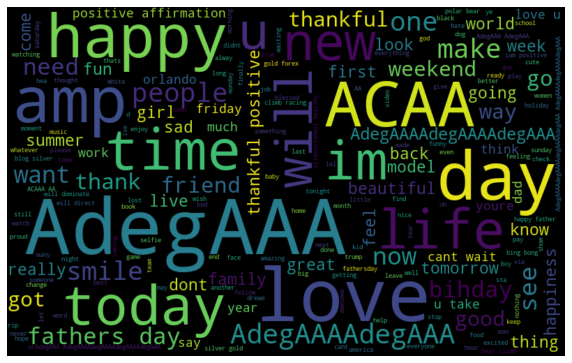

In [ ]:
all_words = ' '.join([text for text in df1['tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


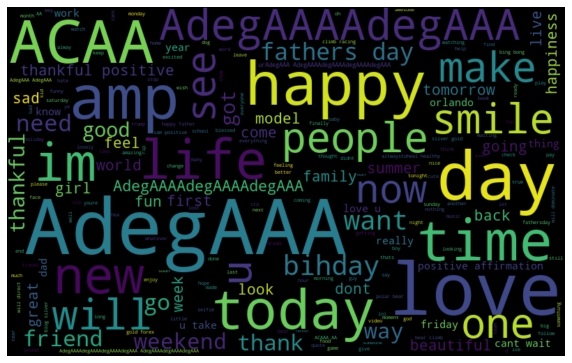

In [ ]:
normal_words =' '.join([text for text in df1['tweet'][df1['label'] == 0]])

wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

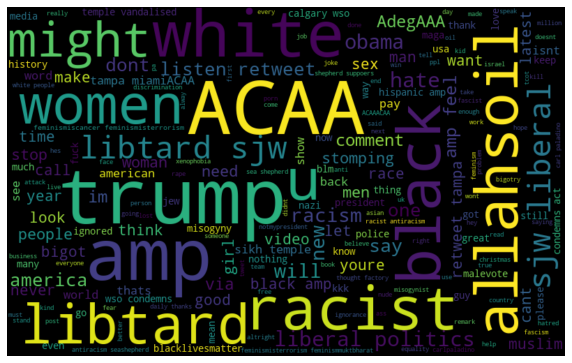

In [ ]:
negative_words = ' '.join([text for text in df1['tweet'][df1['label'] == 1]])
wordcloud = WordCloud(width=800, height=500,
random_state=21, max_font_size=110).generate(negative_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
vectorizer = CountVectorizer(max_df = 0.9,min_df = 10)
X = vectorizer.fit_transform(df1['tweet'])

In [ ]:
X.toarray()[3000]

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
print(vectorizer.get_feature_names())

['02', '05', '10', '100', '11', '11th', '12', '12a', '12adegaaa', '12adegaaaadegaaa', '13', '14', '14a', '14acaaa', '14adegaaa', '14adegaaaadegaaa', '14th', '15', '16', '17', '18', '19', '1gabba', '1st', '20', '200', '2008', '2015', '2016', '2017', '20th', '21', '21st', '22', '23', '24', '25', '27', '28', '2b', '2day', '2nd', '30', '31', '34', '34a', '34aa', '34aaa3a', '34adegaaa', '34adegaaaadegaaa', '35', '3d', '3rd', '40', '40404', '49', '4th', '50', '53', '5th', '6pm', '6th', '70', '80', '90', '95', '9th', 'a1aa', 'a3a', 'aa', 'aaa', 'aaaa', 'aaacaa', 'aaacaaa', 'aaacaaoa', 'aaadegaaa', 'aaadegaaaacaaa', 'aaadegaaaadegaaa', 'aaadegaaaadegaaaadegaaa', 'aaadegaaaadegaaaadegaaaadegaaa', 'aacaa', 'aap', 'able', 'about', 'above', 'abrahamhicks', 'absolute', 'absolutely', 'abt', 'abuse', 'acaa', 'acaa1a', 'acaaa', 'acaaacaa', 'acaaacaaacaa', 'acaaadegaaa', 'acaaadegaaaa', 'acaaanne', 'acaac', 'acaao', 'acaaoa', 'acaap', 'acaarobe', 'acaay', 'acaayvenusexchangeacaay', 'accept', 'accepted'

In [ ]:
len(vectorizer.get_feature_names())

3501

In [ ]:
X.toarray().shape

(31962, 3501)

In [ ]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)

In [ ]:
df1.iloc[30000]['tweet']

'i will never msg him first if he dun msg me firstdisappointed'

In [ ]:
sum(X.toarray()[30000])

7

In [ ]:
X.toarray()[30000]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
print(vectorizer.get_feature_names()[345])
print(vectorizer.get_feature_names()[456])

ball
bloggers


In [ ]:
from sklearn.model_selection import train_test_split
msg_train,msg_test,label_train,label_test = train_test_split(df1['tweet'],df1['label'],test_size=0.2)


In [ ]:
msg_train.head()

2002                         this always tears me up anime
28631    ACAAA-AAAdegAAA APSAAAPSAAaAPSAA-APSAAc AAAYAP...
7695     fargo gorilla simulator you need to do to adap...
7779     its never too late to have a childhood - berke...
29763    8 habits that have hijacked your hormones-keys...
Name: tweet, dtype: object

In [ ]:
train_vectorized = vectorizer.transform(msg_train)
test_vectorized = vectorizer.transform(msg_test)

In [ ]:
train_vectorized

<25569x3501 sparse matrix of type '<class 'numpy.int64'>'
	with 233331 stored elements in Compressed Sparse Row format>

In [ ]:
train_array= train_vectorized.toarray()
test_array = test_vectorized.toarray()

In [ ]:
from sklearn.naive_bayes import GaussianNB
recist_detect_model = GaussianNB().fit(train_array,label_train)

In [ ]:
train_preds = recist_detect_model.predict(train_array)
test_preds = recist_detect_model.predict(test_array)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix

In [ ]:
# Confusion matrices for train and test 

print(confusion_matrix(label_train,train_preds))
print(confusion_matrix(label_test,test_preds))

[[17958  5856]
 [    0  1755]]
[[4421 1485]
 [ 122  365]]


In [ ]:
# Print the classification report for train and test
print(classification_report(label_train,train_preds))
print("\n")
print(classification_report(label_test,test_preds))

              precision    recall  f1-score   support

           0       1.00      0.75      0.86     23814
           1       0.23      1.00      0.37      1755

    accuracy                           0.77     25569
   macro avg       0.62      0.88      0.62     25569
weighted avg       0.95      0.77      0.83     25569



              precision    recall  f1-score   support

           0       0.97      0.75      0.85      5906
           1       0.20      0.75      0.31       487

    accuracy                           0.75      6393
   macro avg       0.59      0.75      0.58      6393
weighted avg       0.91      0.75      0.81      6393



In [ ]:
df2['test_tweet'] = df2['test_tweet'].apply(tweet_cleaner)
df2

,id,tweet,test_tweet,#
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,white supremacists want everyone to see the ne...,#white #supremacists #birdsÃ¢ÂÂ #movie
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe ways to heal your acne altwaystoheal heal...,#acne!! #altwaystoheal #healthy #healing!!
3,31966,is the hp and the cursed child book up for res...,is the hp and the cursed child book up for res...,#harrypotter #pottermore #favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday to my amazing hilarious nephew eli ...,#bihday #nephew
...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left-right polarisation trump ...,#trump #uselections2016 #leadership #politics ...
17193,49156,feeling like a mermaid Ã°ÂÂÂ #hairflip #nev...,feeling like a mermaid hairflip neverready fo...,#hairflip #neverready #formal #wedding #gown #...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today in ohioomg amp used w...,#hillary #campaigned #ohio((omg)) #clinton #ra...
17195,49158,"happy, at work conference: right mindset leads...",happy at work conference right mindset leads t...,#work #mindset


In [ ]:
# remove stopwords
df2['test_tweet'] = df2['test_tweet'].apply(lambda x : ' '.join([word for word in x.split() if not word in set(stopwords.words('english'))]))


In [ ]:
#Lemmitization
lemmatizer = WordNetLemmatizer()
df2['test_tweet'] = df2['test_tweet'].apply(lambda x : ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df2.head()

,id,tweet,test_tweet,#
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone see new bird m...,#white #supremacists #birdsÃ¢ÂÂ #movie
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,#acne!! #altwaystoheal #healthy #healing!!
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...,#harrypotter #pottermore #favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amazing hilarious nephew eli ahmir ...,#bihday #nephew


In [ ]:
corpus=df2.tweet.apply(word_tokenize)
corpus


0        [#, studiolife, #, aislife, #, requires, #, pa...
1        [@, user, #, white, #, supremacists, want, eve...
2        [safe, ways, to, heal, your, #, acne, !, !, #,...
3        [is, the, hp, and, the, cursed, child, book, u...
4        [3rd, #, bihday, to, my, amazing, ,, hilarious...
                               ...                        
17192    [thought, factory, :, left-right, polarisation...
17193    [feeling, like, a, mermaid, Ã°ÂÂÂ, #, hairf...
17194    [#, hillary, #, campaigned, today, in, #, ohio...
17195    [happy, ,, at, work, conference, :, right, min...
17196    [my, song, ``, so, glad, '', free, download, !...
Name: tweet, Length: 17197, dtype: object

In [ ]:
#Ensuring all the tweets are tokenized into individual words
len(df2["test_tweet"])
df2

,id,tweet,test_tweet,#
0,31963,#studiolife #aislife #requires #passion #dedic...,studiolife aislife requires passion dedication...,#studiolife #aislife #requires #passion #dedic...
1,31964,@user #white #supremacists want everyone to s...,white supremacist want everyone see new bird m...,#white #supremacists #birdsÃ¢ÂÂ #movie
2,31965,safe ways to heal your #acne!! #altwaystohe...,safe way heal acne altwaystoheal healthy healing,#acne!! #altwaystoheal #healthy #healing!!
3,31966,is the hp and the cursed child book up for res...,hp cursed child book reservation already yes h...,#harrypotter #pottermore #favorite
4,31967,"3rd #bihday to my amazing, hilarious #nephew...",3rd bihday amazing hilarious nephew eli ahmir ...,#bihday #nephew
...,...,...,...,...
17192,49155,thought factory: left-right polarisation! #tru...,thought factory left-right polarisation trump ...,#trump #uselections2016 #leadership #politics ...
17193,49156,feeling like a mermaid Ã°ÂÂÂ #hairflip #nev...,feeling like mermaid hairflip neverready forma...,#hairflip #neverready #formal #wedding #gown #...
17194,49157,#hillary #campaigned today in #ohio((omg)) &am...,hillary campaigned today ohioomg amp used word...,#hillary #campaigned #ohio((omg)) #clinton #ra...
17195,49158,"happy, at work conference: right mindset leads...",happy work conference right mindset lead cultu...,#work #mindset


In [ ]:
df2.drop(['tweet','#','id'],inplace = True,axis=1)
df2


,test_tweet
0,studiolife aislife requires passion dedication...
1,white supremacist want everyone see new bird m...
2,safe way heal acne altwaystoheal healthy healing
3,hp cursed child book reservation already yes h...
4,3rd bihday amazing hilarious nephew eli ahmir ...
...,...
17192,thought factory left-right polarisation trump ...
17193,feeling like mermaid hairflip neverready forma...
17194,hillary campaigned today ohioomg amp used word...
17195,happy work conference right mindset lead cultu...


In [ ]:
train_vectorized2 = vectorizer.transform(df2['test_tweet'])
train_vectorized2.toarray()[17192]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
result_prediction = recist_detect_model.predict(train_vectorized2.toarray())

In [ ]:
result_prediction

array([0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1,

In [ ]:
df2['result'] =pd.Series(result_prediction)
df2=df2.reset_index(drop=True)
df2

,test_tweet,result
0,studiolife aislife requires passion dedication...,0
1,white supremacist want everyone see new bird m...,0
2,safe way heal acne altwaystoheal healthy healing,0
3,hp cursed child book reservation already yes h...,1
4,3rd bihday amazing hilarious nephew eli ahmir ...,0
...,...,...
17192,thought factory left-right polarisation trump ...,1
17193,feeling like mermaid hairflip neverready forma...,0
17194,hillary campaigned today ohioomg amp used word...,1
17195,happy work conference right mindset lead cultu...,0


In [ ]:
df_new = df2[['test_tweet', 'result']]
df_new

,test_tweet,result
0,studiolife aislife requires passion dedication...,0
1,white supremacist want everyone see new bird m...,0
2,safe way heal acne altwaystoheal healthy healing,0
3,hp cursed child book reservation already yes h...,1
4,3rd bihday amazing hilarious nephew eli ahmir ...,0
...,...,...
17192,thought factory left-right polarisation trump ...,1
17193,feeling like mermaid hairflip neverready forma...,0
17194,hillary campaigned today ohioomg amp used word...,1
17195,happy work conference right mindset lead cultu...,0


In [ ]:
df_new['result'] = df_new['result'].map({1:'racist', 0:'non-racist'})
df_new.set_index('result')


,test_tweet
result,
non-racist,studiolife aislife requires passion dedication...
non-racist,white supremacist want everyone see new bird m...
non-racist,safe way heal acne altwaystoheal healthy healing
racist,hp cursed child book reservation already yes h...
non-racist,3rd bihday amazing hilarious nephew eli ahmir ...
...,...
racist,thought factory left-right polarisation trump ...
non-racist,feeling like mermaid hairflip neverready forma...
racist,hillary campaigned today ohioomg amp used word...


In [ ]:
df_new['length'] = df_new['test_tweet'].apply(len)
Average_no_of_words_per_tweet=df_new['length'].mean()
print(f'Average number of words per tweet:{Average_no_of_words_per_tweet}')

Average number of words per tweet:53.74460661743327


In [ ]:
df_new['result'].value_counts()


non-racist    11868
racist         5329
Name: result, dtype: int64

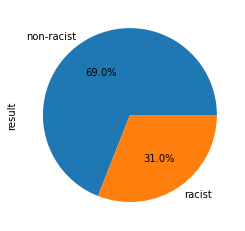

In [ ]:
df_new['result'].value_counts().plot(kind='pie', autopct='%1.1f%%')


# **Conclusion**

# We have analyzied the tweeter data for getting sentiment of the user regarding the tweet is either racist or non racist, So here we have found out in the given data files on which we have to found out the sentiment is 69% non-racist and 31% non racist

